In [ ]:
import torch
import numpy as np

from torchvision import datasets
import torchvision.transforms as transforms

In [ ]:
num_workers = 0
batch_size = 20

In [ ]:
transform = transforms.ToTensor()

In [ ]:
train_data = datasets.MNIST(root="data",
                            train=True,
                            download=True,
                            transform=transform)

test_data = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)

In [ ]:
train_loader = torch.utils.data.DataLoader(train_data,
                                           batch_size=batch_size,
                                           num_workers=num_workers)

test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=batch_size, 
                                          num_workers=num_workers)

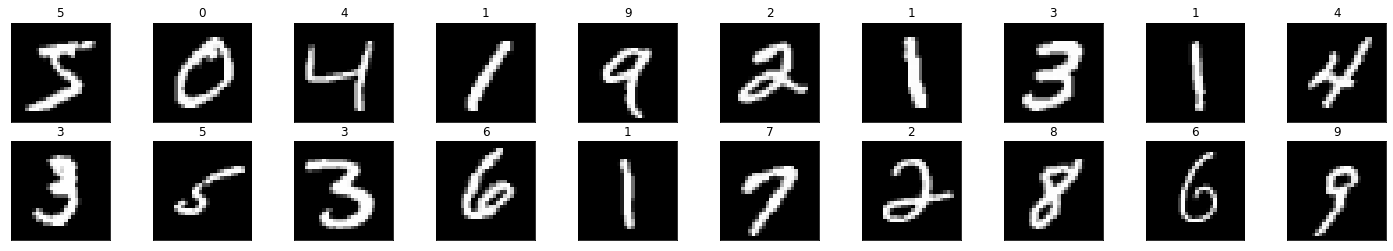

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
    
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

# Peeking into dataset
fig = plt.figure(figsize=(25, 4))
for image in np.arange(20):
    ax = fig.add_subplot(2, 20/2, image+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[image]), cmap='gray')
    ax.set_title(str(labels[image].item()))

# Basic PyTorch

In [11]:
import torch.nn as nn

In [14]:
x = torch.tensor(1., requires_grad=True)
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(3., requires_grad=True)

#Computional model
y = w * x + b

In [16]:
y.backward()

print(x.grad, w.grad, b.grad)

tensor(2.) tensor(1.) tensor(1.)


# Basic autograd. Linear model

In [17]:
x = torch.randn(10, 3)
y = torch.randn(10, 2)

linear = nn.Linear(3,2)

print("W:", linear.weight)
print("B:", linear.bias)

W: Parameter containing:
tensor([[-0.5182,  0.3812,  0.0862],
        [-0.1077, -0.2510, -0.4740]], requires_grad=True)
B: Parameter containing:
tensor([0.0509, 0.1808], requires_grad=True)


In [18]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=.01)

In [21]:
pred = linear(x)
loss = criterion(pred, y)
print("Loss: ", loss.item())

Loss:  1.4622563123703003


In [22]:
loss.backward()

In [24]:
print("dL/dw:", linear.weight.grad)
print("dL/db:", linear.bias.grad)

dL/dw: tensor([[-0.4646,  0.5547, -0.1031],
        [-0.1968, -0.3741, -0.5030]])
dL/db: tensor([-0.3581,  0.0433])


In [25]:
optimizer.step()

In [26]:
pred = linear(x)
loss = criterion(pred, y)
print('loss after 1 step optimization: ', loss.item())

loss after 1 step optimization:  1.4513428211212158


In [27]:
print(linear)

Linear(in_features=3, out_features=2, bias=True)


# Tensor from Numpy

In [30]:
x = np.array([[1,2], [3,4]])
y = torch.from_numpy(x)

z = y.numpy()

print(x, "\n", y,"\n", z)

[[1 2]
 [3 4]] 
 tensor([[1, 2],
        [3, 4]]) 
 [[1 2]
 [3 4]]


# Train Linear model

In [31]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

In [33]:
model = nn.Linear(input_size, output_size)

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),
                            lr=learning_rate)


In [34]:
for epoch in range(num_epochs):
  inputs = torch.from_numpy(x_train)
  targets = torch.from_numpy(y_train)

  outputs = model(inputs)
  loss = criterion(outputs, targets)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if (epoch + 1) % 5 == 0:
    print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))


Epoch [5/60], Loss: 2.0933
Epoch [10/60], Loss: 0.9512
Epoch [15/60], Loss: 0.4886
Epoch [20/60], Loss: 0.3011
Epoch [25/60], Loss: 0.2252
Epoch [30/60], Loss: 0.1944
Epoch [35/60], Loss: 0.1819
Epoch [40/60], Loss: 0.1769
Epoch [45/60], Loss: 0.1748
Epoch [50/60], Loss: 0.1740
Epoch [55/60], Loss: 0.1736
Epoch [60/60], Loss: 0.1735


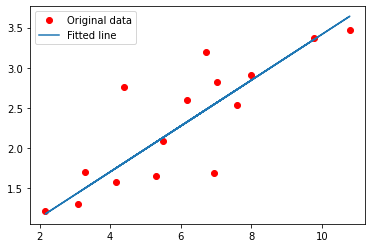

In [35]:
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

# Train logistic regression

In [36]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [37]:
input_size = 28 * 28    # 784
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

In [39]:
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

In [40]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [41]:
model = nn.Linear(input_size, num_classes)
criterion = nn.CrossEntropyLoss()
  
optimizer = torch.optim.SGD(model.parameters(),
                            lr=learning_rate)

In [42]:
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, input_size)
        
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/600], Loss: 2.1666
Epoch [1/5], Step [200/600], Loss: 2.0934
Epoch [1/5], Step [300/600], Loss: 1.9608
Epoch [1/5], Step [400/600], Loss: 1.9350
Epoch [1/5], Step [500/600], Loss: 1.8372
Epoch [1/5], Step [600/600], Loss: 1.8148
Epoch [2/5], Step [100/600], Loss: 1.7561
Epoch [2/5], Step [200/600], Loss: 1.6295
Epoch [2/5], Step [300/600], Loss: 1.5950
Epoch [2/5], Step [400/600], Loss: 1.6494
Epoch [2/5], Step [500/600], Loss: 1.5558
Epoch [2/5], Step [600/600], Loss: 1.4128
Epoch [3/5], Step [100/600], Loss: 1.4371
Epoch [3/5], Step [200/600], Loss: 1.3692
Epoch [3/5], Step [300/600], Loss: 1.4004
Epoch [3/5], Step [400/600], Loss: 1.2410
Epoch [3/5], Step [500/600], Loss: 1.2979
Epoch [3/5], Step [600/600], Loss: 1.2980
Epoch [4/5], Step [100/600], Loss: 1.2300
Epoch [4/5], Step [200/600], Loss: 1.1190
Epoch [4/5], Step [300/600], Loss: 1.1818
Epoch [4/5], Step [400/600], Loss: 1.1142
Epoch [4/5], Step [500/600], Loss: 1.2120
Epoch [4/5], Step [600/600], Loss:

In [43]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, input_size)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

    print('Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))


Accuracy of the model on the 10000 test images: 82.0 %


# Train Fully Connected Neural Network 

In [44]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [45]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [48]:
#Parameters

input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

In [49]:
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

In [50]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [60]:
class NeuralNetReLU(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNetReLU, self).__init__()
    
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)

    return out

class NeuralNetSigmoid(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNetSigmoid, self).__init__()
    
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.act1 = nn.Sigmoid()
    self.fc2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out = self.fc1(x)
    out = self.act1(out)
    out = self.fc2(out)

    return out

## Train NN with ReLU activation

In [55]:
model = NeuralNetReLU(input_size, hidden_size, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)



In [56]:
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/600], Loss: 0.2825
Epoch [1/5], Step [200/600], Loss: 0.3230
Epoch [1/5], Step [300/600], Loss: 0.1309
Epoch [1/5], Step [400/600], Loss: 0.1368
Epoch [1/5], Step [500/600], Loss: 0.2041
Epoch [1/5], Step [600/600], Loss: 0.1510
Epoch [2/5], Step [100/600], Loss: 0.1167
Epoch [2/5], Step [200/600], Loss: 0.2421
Epoch [2/5], Step [300/600], Loss: 0.1853
Epoch [2/5], Step [400/600], Loss: 0.1026
Epoch [2/5], Step [500/600], Loss: 0.0850
Epoch [2/5], Step [600/600], Loss: 0.0963
Epoch [3/5], Step [100/600], Loss: 0.0687
Epoch [3/5], Step [200/600], Loss: 0.0854
Epoch [3/5], Step [300/600], Loss: 0.0252
Epoch [3/5], Step [400/600], Loss: 0.0521
Epoch [3/5], Step [500/600], Loss: 0.0610
Epoch [3/5], Step [600/600], Loss: 0.0646
Epoch [4/5], Step [100/600], Loss: 0.0304
Epoch [4/5], Step [200/600], Loss: 0.0472
Epoch [4/5], Step [300/600], Loss: 0.0249
Epoch [4/5], Step [400/600], Loss: 0.0873
Epoch [4/5], Step [500/600], Loss: 0.0269
Epoch [4/5], Step [600/600], Loss:

In [57]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

Accuracy of the network on the 10000 test images: 97.99 %


## Train NN with Sigmoid Activation

In [61]:
model = NeuralNetSigmoid(input_size, hidden_size, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [62]:
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/600], Loss: 0.4671
Epoch [1/5], Step [200/600], Loss: 0.4040
Epoch [1/5], Step [300/600], Loss: 0.3343
Epoch [1/5], Step [400/600], Loss: 0.2603
Epoch [1/5], Step [500/600], Loss: 0.2274
Epoch [1/5], Step [600/600], Loss: 0.2900
Epoch [2/5], Step [100/600], Loss: 0.2054
Epoch [2/5], Step [200/600], Loss: 0.2075
Epoch [2/5], Step [300/600], Loss: 0.1927
Epoch [2/5], Step [400/600], Loss: 0.2628
Epoch [2/5], Step [500/600], Loss: 0.1300
Epoch [2/5], Step [600/600], Loss: 0.0988
Epoch [3/5], Step [100/600], Loss: 0.1201
Epoch [3/5], Step [200/600], Loss: 0.0976
Epoch [3/5], Step [300/600], Loss: 0.1844
Epoch [3/5], Step [400/600], Loss: 0.1332
Epoch [3/5], Step [500/600], Loss: 0.1236
Epoch [3/5], Step [600/600], Loss: 0.1540
Epoch [4/5], Step [100/600], Loss: 0.1373
Epoch [4/5], Step [200/600], Loss: 0.1446
Epoch [4/5], Step [300/600], Loss: 0.1168
Epoch [4/5], Step [400/600], Loss: 0.0540
Epoch [4/5], Step [500/600], Loss: 0.0949
Epoch [4/5], Step [600/600], Loss:

In [63]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

Accuracy of the network on the 10000 test images: 96.74 %
